<a href="https://colab.research.google.com/github/DaffaFathir/Machine-Learning-Task/blob/main/Tugas%2012/CNN_NiN_Daffa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
# Nama    : Daffa Fathir Fajri
# NIM     : 1103213149
# Kelas   : TK-45-04
# Lecture : 12
# Model   : CNN (NiN)
# Dataset : Fashion MNIST

chatGPT promph : https://chatgpt.com/share/19b146d0-c916-498c-96fa-844153d4128a

**Pertama, kita perlu mengimpor semua pustaka yang diperlukan.**

In [39]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from google.colab import drive


**Hubungkan Google Drive agar kita bisa mengakses dataset.**

In [40]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Baca file train.csv dan test.csv dari Google Drive.**

In [41]:
# Path to your dataset files
train_path = '/content/drive/MyDrive/Machine Learning/Fashion/fashion-mnist_train.csv'
test_path = '/content/drive/MyDrive/Machine Learning/Fashion/fashion-mnist_test.csv'

# Load datasets
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

**Pisahkan fitur dan label, normalisasi data, dan ubah label menjadi one-hot encoding.**

In [42]:
# Split features and labels
X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape data to match the input shape of the CNN
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

**Definisikan arsitektur model NiN**

In [43]:
model = Sequential()

# 1st mlpconv block
model.add(Conv2D(filters=192, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=160, kernel_size=(1,1), padding='same', activation='relu'))
model.add(Conv2D(filters=96, kernel_size=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model.add(Dropout(0.5))

# 2nd mlpconv block
model.add(Conv2D(filters=192, kernel_size=(5,5), padding='same', activation='relu'))
model.add(Conv2D(filters=192, kernel_size=(1,1), padding='same', activation='relu'))
model.add(Conv2D(filters=192, kernel_size=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model.add(Dropout(0.5))

# 3rd mlpconv block
model.add(Conv2D(filters=192, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=192, kernel_size=(1,1), padding='same', activation='relu'))
model.add(Conv2D(filters=10, kernel_size=(1,1), padding='same', activation='relu'))

# Global Average Pooling
model.add(GlobalAveragePooling2D())
model.add(Dense(10, activation='softmax'))

# Print the model summary
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 28, 28, 192)       4992      
                                                                 
 conv2d_37 (Conv2D)          (None, 28, 28, 160)       30880     
                                                                 
 conv2d_38 (Conv2D)          (None, 28, 28, 96)        15456     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 13, 13, 96)        0         
 ng2D)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 13, 13, 96)        0         
                                                                 
 conv2d_39 (Conv2D)          (None, 13, 13, 192)       460992    
                                                      

**Mengatur parameter untuk training.**

In [44]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Melatih model dengan data yang sudah disiapkan.**

In [45]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 20s 22ms/step - loss: 1.2121 - accuracy: 0.5430 - val_loss: 0.6378 - val_accuracy: 0.7875
Epoch 2/20
750/750 [==============================] - 16s 21ms/step - loss: 0.5714 - accuracy: 0.7947 - val_loss: 0.4517 - val_accuracy: 0.8334
Epoch 3/20
750/750 [==============================] - 16s 22ms/step - loss: 0.4561 - accuracy: 0.8371 - val_loss: 0.3840 - val_accuracy: 0.8602
Epoch 4/20
750/750 [==============================] - 16s 21ms/step - loss: 0.3909 - accuracy: 0.8587 - val_loss: 0.3558 - val_accuracy: 0.8693
Epoch 5/20
750/750 [==============================] - 16s 21ms/step - loss: 0.3526 - accuracy: 0.8720 - val_loss: 0.3331 - val_accuracy: 0.8857
Epoch 6/20
750/750 [==============================] - 16s 21ms/step - loss: 0.3274 - accuracy: 0.8813 - val_loss: 0.3006 - val_accuracy: 0.8914
Epoch 7/20
750/750 [==============================] - 16s 21ms/step - loss: 0.3052 - accuracy: 0.8912 - val_loss: 0.2858 - val_accuracy:

**Mengevaluasi model dengan data uji.**

In [46]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


313/313 [==============================] - 2s 6ms/step - loss: 0.2034 - accuracy: 0.9280
Test Loss: 0.2034408152103424
Test Accuracy: 0.9279999732971191


**Visualisasi kinerja model selama training.**

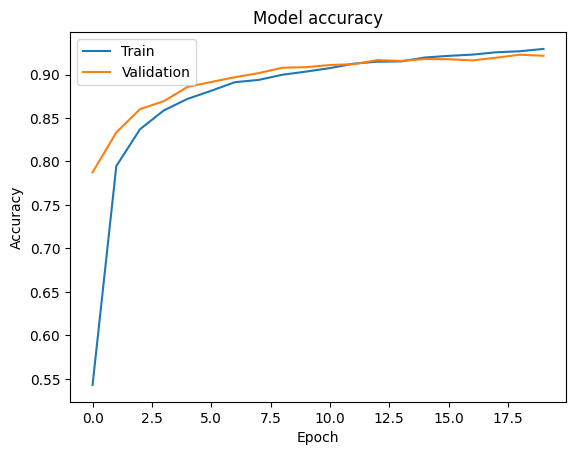

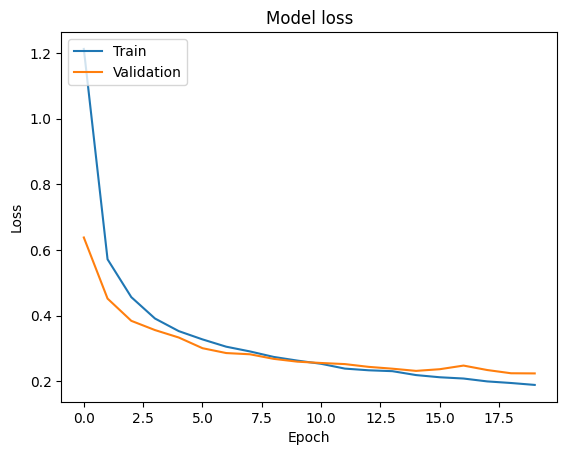

In [47]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
